In [20]:
### Welcome to INFOSS - an Interferometer for Neutrino Flavour Oscillations on a Schwarzschild Spacetime.

### Input the desired parameters for the desired plot and wait for the interference pattern to generate.

# Initial interference pattern (can also be used to reset the second plot)

compiledthetaplots = []
compiledrplots = []
compiledoscprobplots = []

'On iteration number 0 with delta 0.5'

-1.0


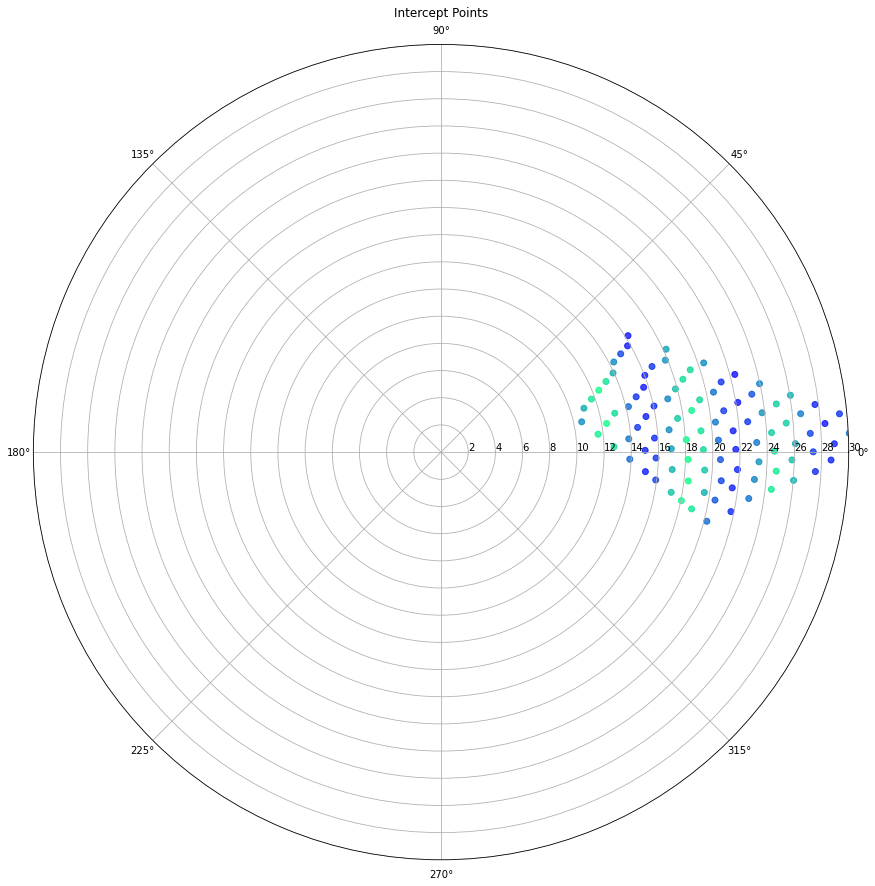

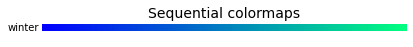

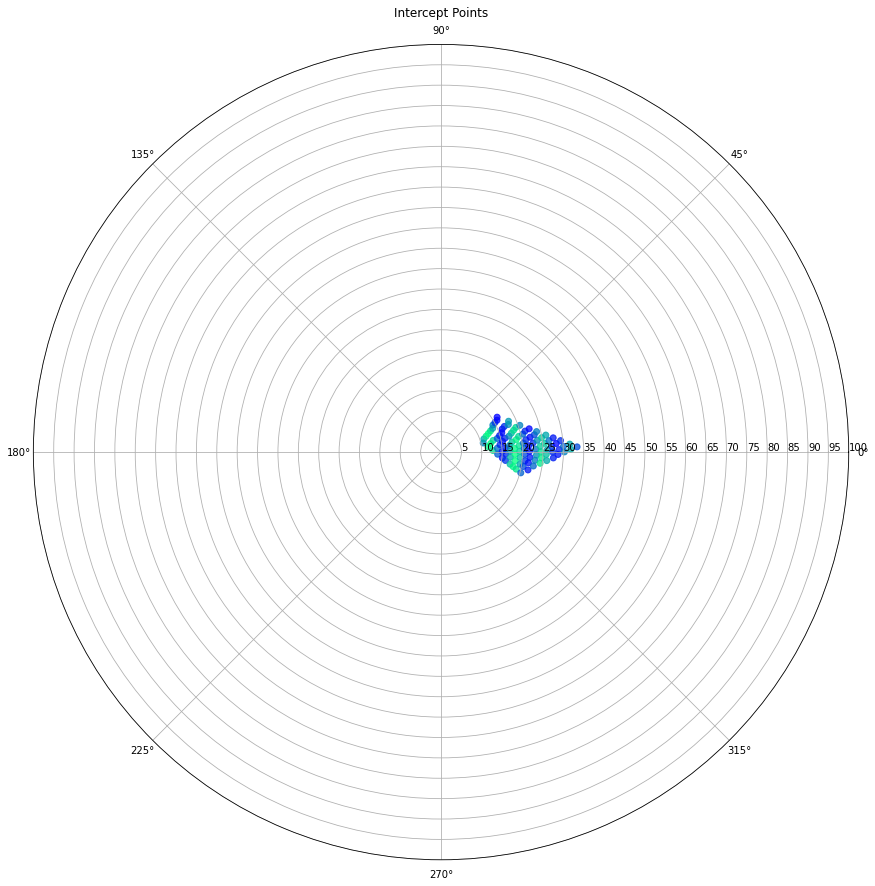

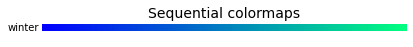

In [21]:
## Plot Parameters ##

# Minimum y-values
ymin = 8

# Number of y-values to be included and interval between different y-values
ycount = 10
yinterval = 0.5

# Particle initial position and momentum on the z-axis
xposition = -20
xmomentum = 1

# Intercept Sensitivity
dp = 1

## FANTASY Parameters ##

# Integration parameters
omega = 1
order = 1

# Number of steps
N = 200

# Timestep
delta = 0.5

# Mass, rotation
Param = [1, 0.7]
M = Param[0]

## Oscillation Probability Parameters ##

mixang = 1
neutrinomassa = 1
neutrinomassb = 0.9

## If an area is to be added (both trajectories vary), set = 'a'. If a linear zone is to be added (one trajectory varies), 
## set = 'l' and set which trajectory will be fixed ('p' for positive or 'n' for negative impact parameter).

set = 'a'
fixedtraj = 'p'
fixedpos = 10.5

%run InternalProcesses/AreaControl.ipynb

## Function determining distribution of initial points - by default inverse exponential, maybe inverse square will be better ##

#for n in range(1, 100, 1):
#    pos(0) = 0
#    pos(n) = pos(n-1) + e**(-x+1)
#    fixedpos = pos(n)
#    set = 'a'
#    fixedtraj = 'p'
#    %run InternalProcesses/AreaControl.ipynb
#    fixedtraj = 'n'
#    %run InternalProcesses/AreaControl.ipynb

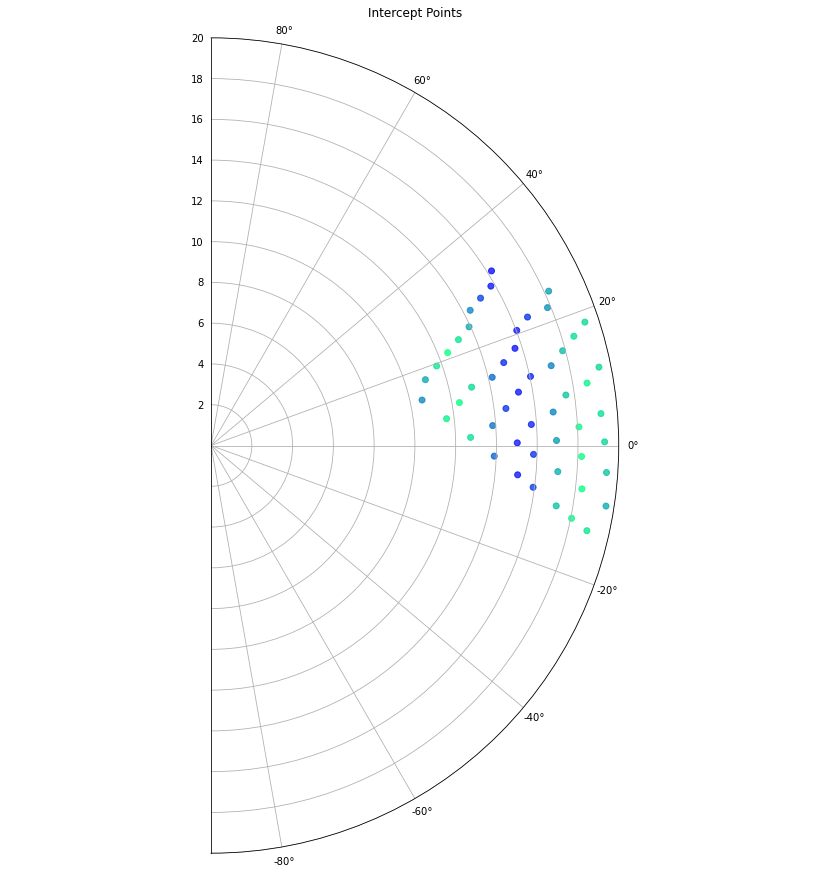

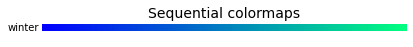

In [22]:
from pylab import *
from scipy import special
import numpy
import csv
from IPython.display import clear_output, display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

fig.set_figwidth(15)
fig.set_figheight(15)

ax.scatter(compiledthetaplots, compiledrplots, c = colours, cmap='winter', alpha=0.75)

ax.set_rmax(20)
ax.set_rticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_rlabel_position(0)
ax.grid(True)

ax.set_rorigin(-0)
ax.set_thetamin(90)
ax.set_thetamax(-90)

ax.set_title("Intercept Points", va='bottom')
plt.show()

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Sequential',
                     ['winter'])

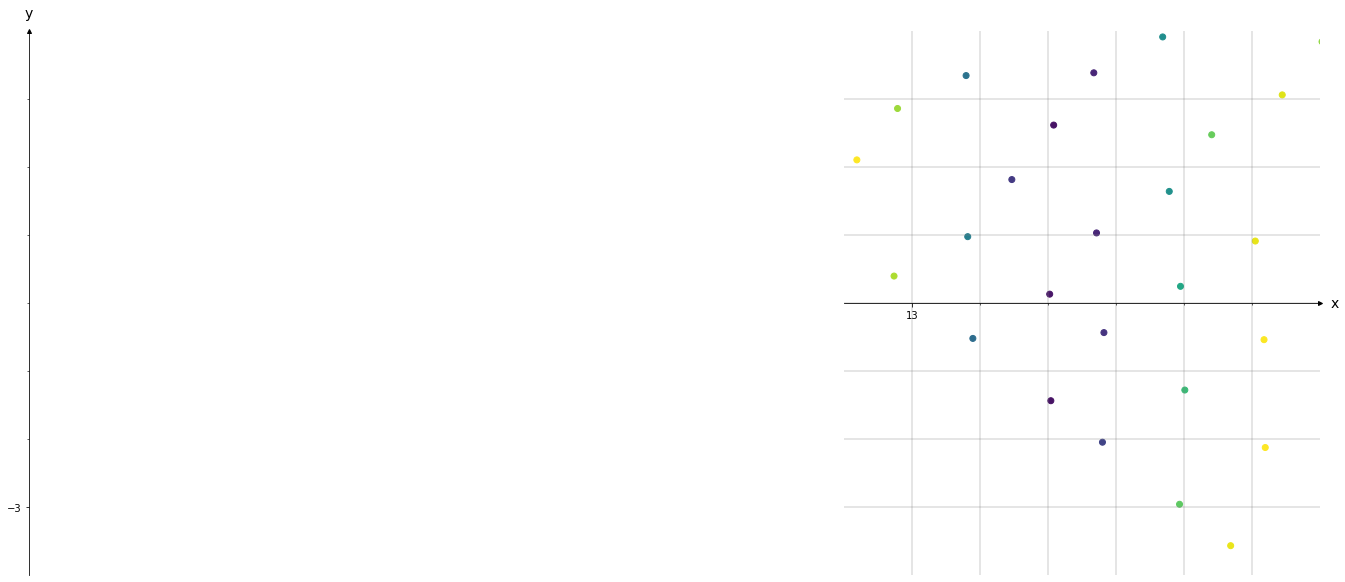

In [23]:
# Enter x and y coordinates of points and colors

xs = []
ys = []


for r in range(len(compiledrplots)):
    x = compiledrplots[r]*cos(compiledthetaplots[r])
    y = compiledrplots[r]*sin(compiledthetaplots[r])
    xs.append(x)
    ys.append(y)

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = 13, 18, -3, 3
ticks_frequency = 10

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys, c=colours)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=2, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()

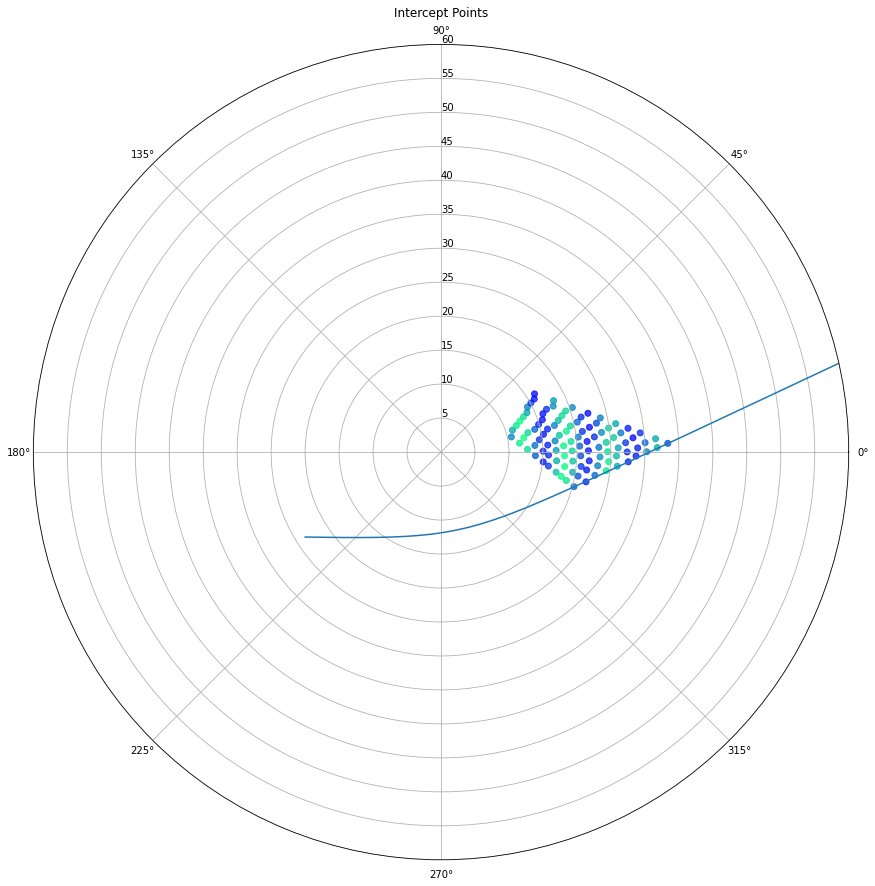

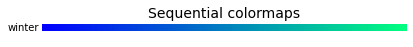

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

fig.set_figwidth(15)
fig.set_figheight(15)

ax.scatter(compiledthetaplots, compiledrplots, c = colours, cmap='winter', alpha=0.75)
ax.plot(phival2, rval2)

ax.set_rmax(plotradius)
ax.set_rticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax.set_rlabel_position(90)
ax.grid(True)

ax.set_rorigin(-0)

ax.set_title("Intercept Points", va='bottom')
plt.show()

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Sequential',
                     ['winter'])

In [25]:
print(len(compiledoscprobplots))

100
